## **AirBnb Booking Analysis**

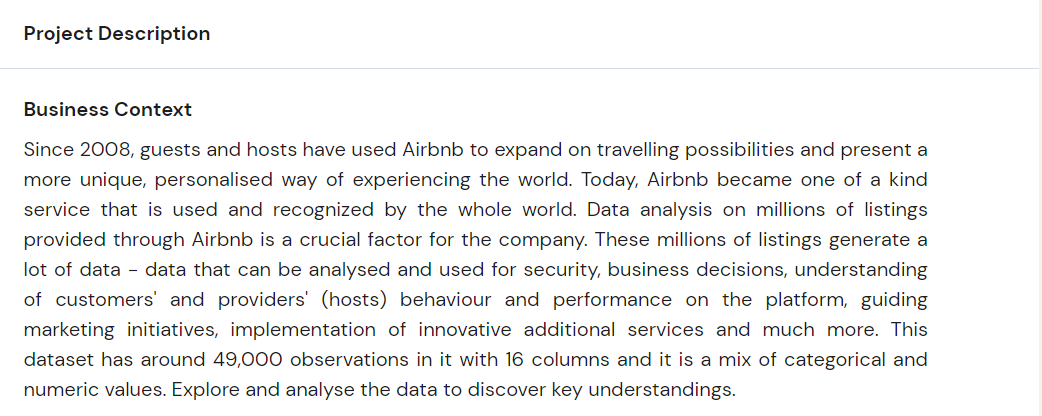

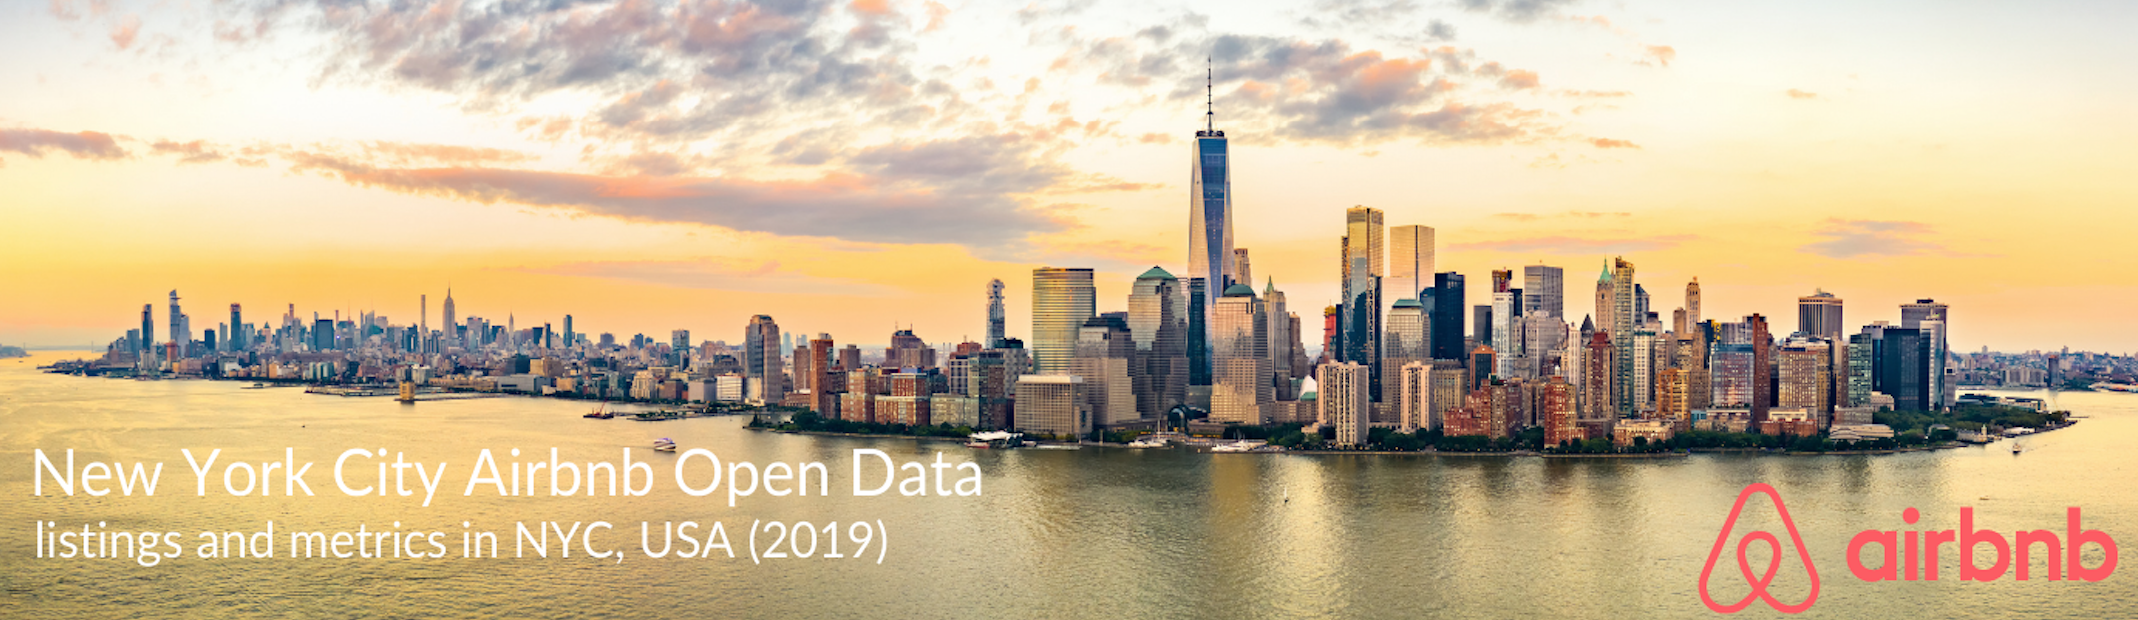

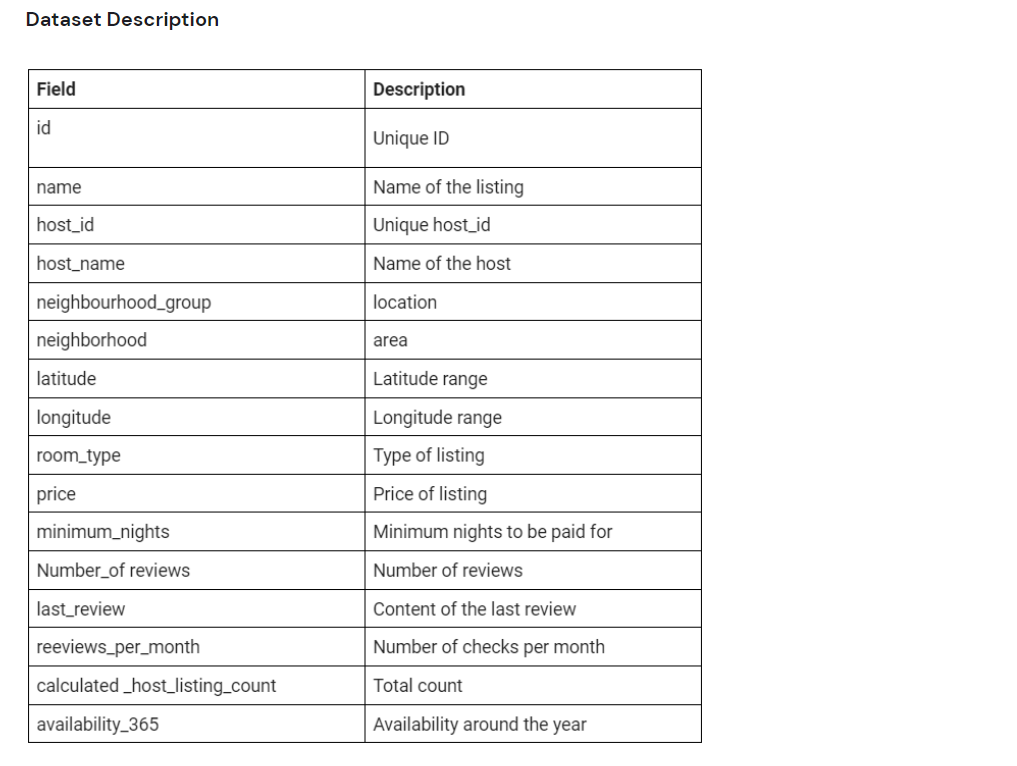

### **GitHub Link - https://github.com/Ramizzx/AirBnb_Booking_Analysis**

### **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Python Project/Airbnb_NYC.csv"
 
df = pd.read_csv(path)
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington  40.64749   
1           Jennifer           Manhattan             Midtown  40.75362   
2          Elisabeth           Manhattan              Harlem  40.80902   
3        LisaRoxanne            Brooklyn        Clinton Hill  40.68514   
4              Laura           Manhattan         East Harlem  40.79851   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0      -73.97237     Private room    149               1                  9   
1      -73.98377  Entire home/apt    225               1                 45   
2      -73.94190     Private room    150               3                  0   
3      -73.95976  Entire home/apt     89               1                270   
4      -73.94399  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [ ]:
#CHECKING THE SHAPE OF THE DATA
df.shape

(48895, 16)

In [ ]:
#CHECKING DATA TYPES
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#check details about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Looking for the description of the dataset
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [ ]:
#Dropping duplicate values
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Dropping unnecessary columns
df.drop(['name','id','last_review'], axis=1, inplace=True)

In [ ]:
#Examining Changes
df.isnull().sum()

host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Replace the 'reviews per month' by zero
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

## **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   host_name                       48874 non-null  object 
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

Index(['host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

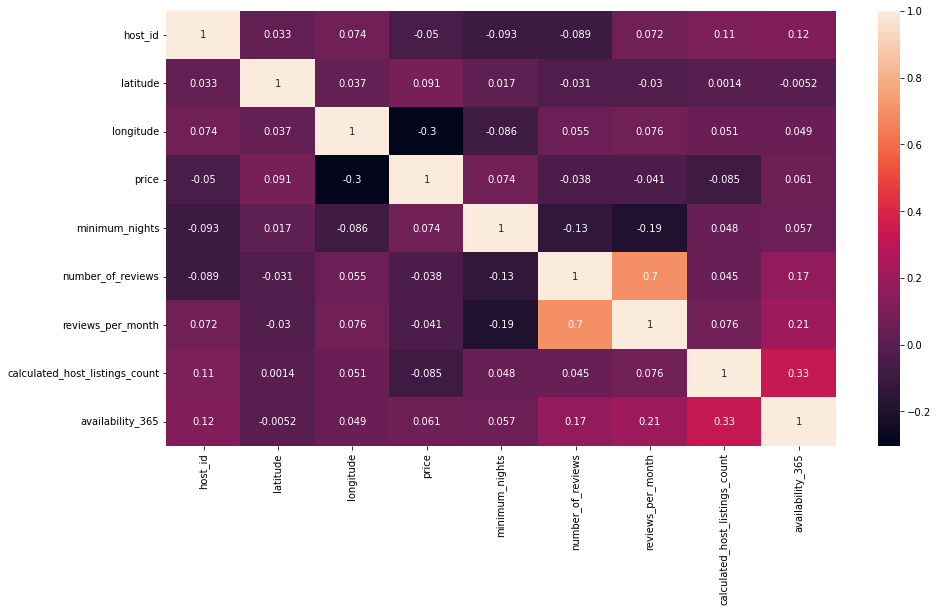

In [ ]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

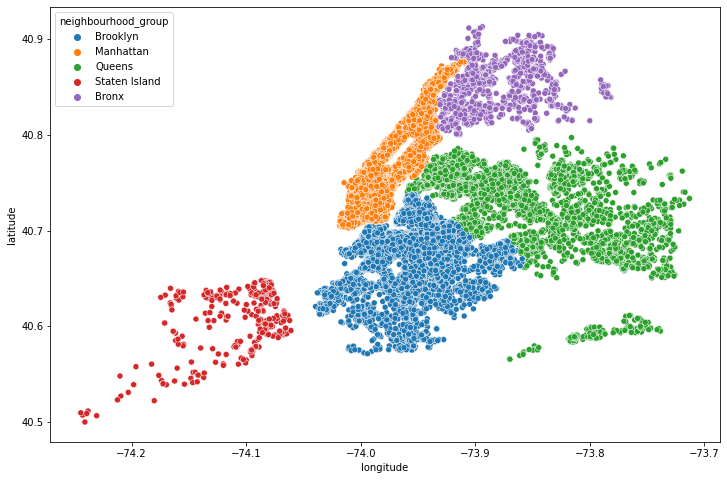

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

From the scatterplot above we observe that Staten Island cluster is away from the other neighborhood groups.

In [ ]:
nhg_pct = df.neighbourhood_group.value_counts(normalize = True)
nhg_pct

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

In [ ]:
#PIE CHART TO ANALYSE NEIGHBOURHOOD GROUP
px.pie(nhg_pct, values=nhg_pct.values, names=nhg_pct.index, title='Neighbourhood Group', width=500)

Pie chart concludes that Majority of the Rooms or Apartments are in the Manhattan and Brooklyn.

In [ ]:
# MEAN PRICES BY ROOM TYPE FOR DIFFERENT NEIGHBOURHOOD GROUPS
df.groupby(['neighbourhood_group', 'room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    127.506596
                     Private room        66.788344
                     Shared room         59.800000
Brooklyn             Entire home/apt    178.327545
                     Private room        76.500099
                     Shared room         50.527845
Manhattan            Entire home/apt    249.239109
                     Private room       116.776622
                     Shared room         88.977083
Queens               Entire home/apt    147.050573
                     Private room        71.762456
                     Shared room         69.020202
Staten Island        Entire home/apt    173.846591
                     Private room        62.292553
                     Shared room         57.444444
Name: price, dtype: float64

From this we can analyse that Prices for all room types are high in Manhattan and low in Staten Island

In [ ]:
df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().sort_values(ascending=False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt    249.239109
Brooklyn             Entire home/apt    178.327545
Staten Island        Entire home/apt    173.846591
Queens               Entire home/apt    147.050573
Bronx                Entire home/apt    127.506596
Manhattan            Private room       116.776622
                     Shared room         88.977083
Brooklyn             Private room        76.500099
Queens               Private room        71.762456
                     Shared room         69.020202
Bronx                Private room        66.788344
Staten Island        Private room        62.292553
Bronx                Shared room         59.800000
Staten Island        Shared room         57.444444
Brooklyn             Shared room         50.527845
Name: price, dtype: float64

In [ ]:
# facetgrid plotly
fig = px.histogram(df, x='neighbourhood_group', y='price', color='room_type', facet_col='room_type', facet_col_wrap=3,
                category_orders={'neighbourhood_group': df.neighbourhood_group.value_counts().index}, histfunc='avg')
fig.show()

As we know Prices for all room types are high in Manhattan and low in Staten Island but there's not much fluctuation in the prices for Private Room

**Neighbourhood Group vs. Availability Room**

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

The graph above shows the relationship between the availability room and neighborhood group where we can see that in Bronx the availability of rooms are for longer period of time.

### **Price Analysis**

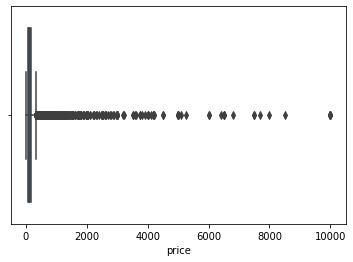

In [ ]:
sns.boxplot(x='price', data=df);

In [ ]:
px.scatter(df[df.price>1000], x='longitude', y='latitude', color='neighbourhood_group', size='price', size_max=15, hover_name='neighbourhood')

In [ ]:
px.box(df[df.price<1000], x='neighbourhood_group', y='price')

In [ ]:
px.box(df, x='room_type', y='price')

Prices in Brooklyn and Manhattan are high for the Room types Private and Entire Home.

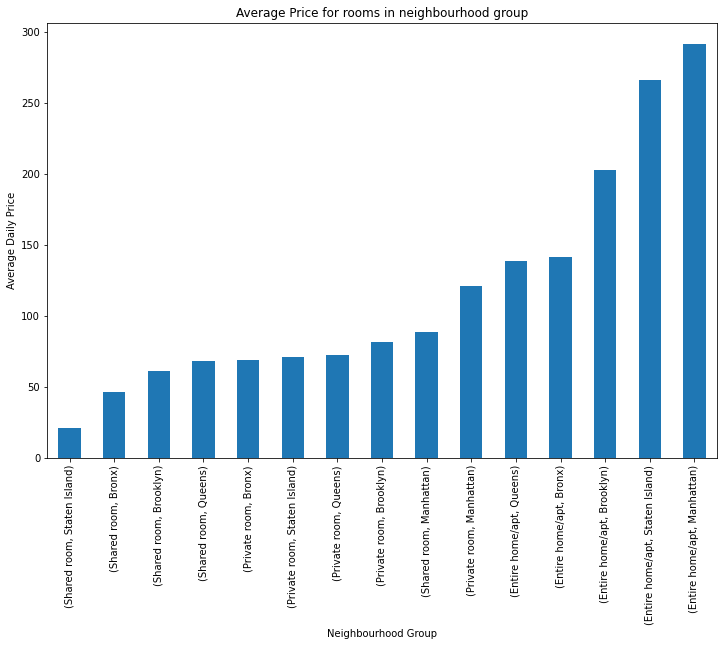

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
plt.figure(figsize=(12,8))
df = df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

### **TOP 5 HOSTS**

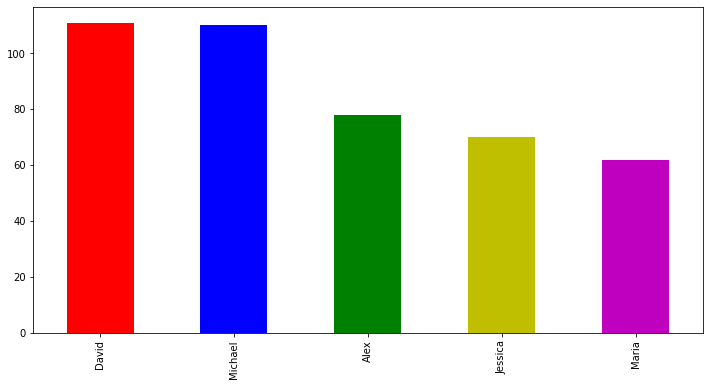

In [ ]:
plt.figure(figsize=(12,6))

df1 = df['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
#sns.barplot(x=df1.index,y=df1.values)

### **Top 10 Apartment listings**

In [ ]:
apt = df[df['room_type']=='Entire home/apt']
list_apt = apt.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).size().reset_index(name='apartment').sort_values(by=['apartment'],ascending=False)
list_apt.head(10)

host_id          host_name       neighbourhood neighbourhood_group  \
3275  177174475            Alberto             Midtown           Manhattan   
2581   67987135               Siyi  Bedford-Stuyvesant            Brooklyn   
3432  213781715             Anting                NoHo           Manhattan   
3378  197053492   Lyric At 70 Pine  Financial District           Manhattan   
3489  221213143              David            Kips Bay           Manhattan   
3326  187487947              Diego          Greenpoint            Brooklyn   
1668   24831061           Hosteeva             Midtown           Manhattan   
1729   26556695             Alyssa             Midtown           Manhattan   
3650  242924411  James And Laureta  Bedford-Stuyvesant            Brooklyn   
3589  231138233              Filiz         East Harlem           Manhattan   

      apartment  
3275         17  
2581          9  
3432          9  
3378          8  
3489          7  
3326          6  
1668          6  
1729          5  
3650          5  
3589          5

### **Top 10 Private room**

In [ ]:
private = df[df['room_type']=='Private room']
list_private = private.groupby(['host_id','host_name','neighbourhood']).size().reset_index(name='private').sort_values(by=['private'],ascending=False)
list_private.head(10)

host_id                       host_name       neighbourhood  private
5446  224414117                         Gabriel      Hell's Kitchen       30
5694  252604696                            Erin             Chelsea       20
4887  159091490                         Melissa             Gowanus       17
5788  260639745       Manhattan At Times Square    Theater District       15
5781  260425153                       Park Lane             Midtown       14
910     6885157                           Randy  Bedford-Stuyvesant       14
5327  213781715                          Anting          Greenpoint       14
104      344035  Brooklyn&   Breakfast    -Len-    Prospect Heights       13
4588  134184451                  Hillside Hotel             Jamaica       12
1679   17555570                             Yan       Crown Heights       12

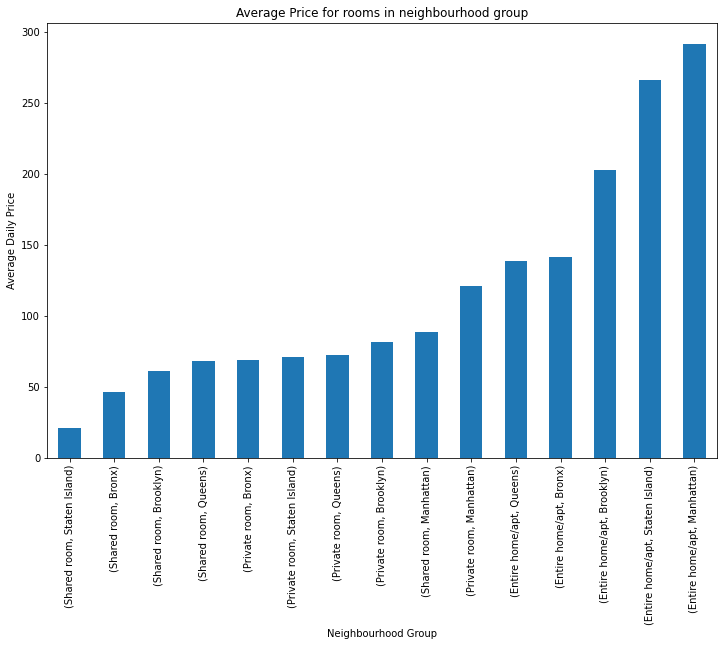

List of Average Price per night based on the neighbourhood group


price
room_type       neighbourhood_group            
Entire home/apt Queens               139.036260
                Bronx                141.541176
                Brooklyn             202.895245
                Staten Island        266.205128
                Manhattan            291.784595
Private room    Bronx                 69.025862
                Staten Island         71.394366
                Queens                72.454958
                Brooklyn              81.713284
                Manhattan            121.434183
Shared room     Staten Island         21.000000
                Bronx                 46.711111
                Brooklyn              60.921212
                Queens                68.459459
                Manhattan             88.462898

In [ ]:
plt.figure(figsize=(12,8))
df = df[df['minimum_nights']==1]
df1 = df.groupby(['room_type','neighbourhood_group'])['price'].mean().sort_values(ascending=True)
df1.plot(kind='bar')
plt.title('Average Price for rooms in neighbourhood group')
plt.ylabel('Average Daily Price')
plt.xlabel('Neighbourhood Group')
plt.show()
print('List of Average Price per night based on the neighbourhood group')
pd.DataFrame(df1).sort_values(by='room_type')

### **Location and Review Score**

Review is the one of the important criteria with online activity these days. This gives a lot of insights to a particular place for tourist and they can swing mood when it comes to online booking. A cheap place with bad review can drive a tourist for not booking and an expensive place with nicest review can shell a tourist more than what he have thought initially. 

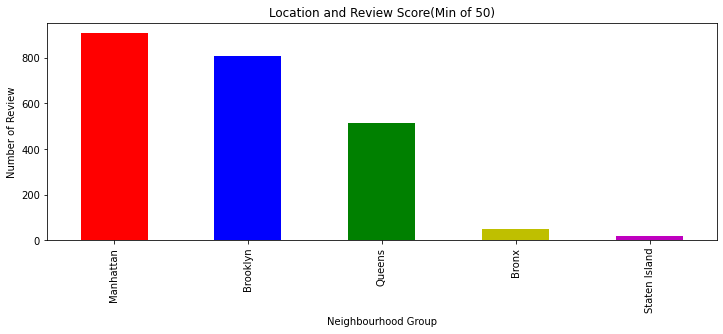

 Count of Review v/s neighbourhood group


neighbourhood_group
Manhattan                      909
Brooklyn                       808
Queens                         515
Bronx                           48
Staten Island                   20

In [ ]:
fig = plt.figure(figsize=(12,4))
review_50 = df[df['number_of_reviews']>=50]
df2 = review_50['neighbourhood_group'].value_counts()
df2.plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Location and Review Score(Min of 50)')
plt.ylabel('Number of Review')
plt.xlabel('Neighbourhood Group')
plt.show()
print(' Count of Review v/s neighbourhood group')
pd.DataFrame(df2)

We observe that there a lot of reviews for Manhattan and Brooklyn as compared to other neighbourhood groups.

## **Conclusion/How the Project is useful to stakeholders.**

Prices in Brooklyn and Manhattan are high for the Room types Private and Entire Homes.

In the Bronx, the availability of rooms is for longer periods of time.
We observe that there are a lot of reviews for Manhattan and Brooklyn as compared to other neighborhood groups.


The top 5 hosts are David Michael Alex Jessica and Maria and we can give them rewards and loyalty points to them.

What is interesting is that for Staten Island we see that there's very less engagement in terms of the number of reviews and Prices and can improvise by offering affordable prices and Refurnishing the property.